In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import scipy

In [ ]:
0# RECEBER OS DADOS:
print("Dados 1")
Trabalho1 = {"m":3.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 2")
Trabalho2 = {"m":4.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 3")
Trabalho3 = {"m":6.00, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados 4")
Trabalho4 = {"m":7.50, "Relaçãoa/c":input("Relaçãoa/c"),"Resistencia28C1":input("Resistencia28C1"), "Resistencia28C2":input("Resistencia28C2")}
print("Dados cimento")
DadosCimento = {"MassaEspecifica":float(input("Massa especifica")), "Custo":float(input("Custo"))}
DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

Dados 1
Relaçãoa/c0.41
Resistencia28C160.2
Resistencia28C258.9
Dados 2
Relaçãoa/c0.54
Resistencia28C143.2
Resistencia28C241.5
Dados 3
Relaçãoa/c0.68
Resistencia28C129.5
Resistencia28C231.3
Dados 4
Relaçãoa/c0.83
Resistencia28C119.3
Resistencia28C221.3
Dados cimento
Massa especifica3.03
Custo600


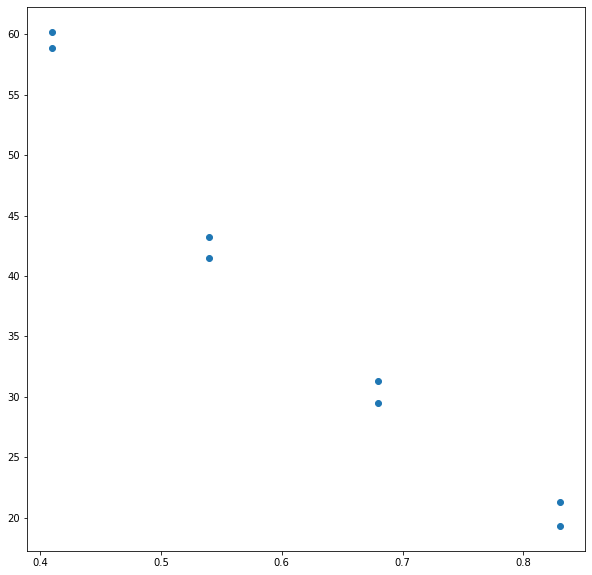

In [ ]:
#UNIR EM UM ARRAY E PLOTAR 
Dadosac = np.array((float(Trabalho1["Relaçãoa/c"]),float(Trabalho1["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho2["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho3["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"]),float(Trabalho4["Relaçãoa/c"])))
DadosRes = np.array((float(Trabalho1["Resistencia28C1"]),float(Trabalho1["Resistencia28C2"]),float(Trabalho2["Resistencia28C1"]),float(Trabalho2["Resistencia28C2"]),float(Trabalho3["Resistencia28C1"]),float(Trabalho3["Resistencia28C2"]),float(Trabalho4["Resistencia28C1"]),float(Trabalho4["Resistencia28C2"])))
Dadosm = np.array((float(Trabalho1["m"]),float(Trabalho1["m"]),float(Trabalho2["m"]),float(Trabalho2["m"]),float(Trabalho3["m"]),float(Trabalho3["m"]),float(Trabalho4["m"]),float(Trabalho4["m"])))
plt.figure(figsize=(10,10))
plt.scatter(Dadosac,DadosRes)

In [ ]:

DdosExtras = { "TeorArgS": 0.55, "DP": 3, "Consistencia":"Classe S100", "Areia":{"MU":1500, "ME":2630, "Custo":70, "Inchamento": 0.29}, "Brita":{"MU":1450, "ME":2950, "Custo":62}}    

In [ ]:
#CLASSES DE AGRESSIVIDADE
ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}
ClassesAgr = [ClasseI,ClasseII,ClasseIII,ClasseIV]
#ADITIVO X REDUCAO DA QUANTIDADE DE AGUA
Aditivo  = [0.002, 0.004, 0.006, 0.008, 0.01]
RedAgua = [0.08, 0.09, 0.11, 0.13, 0.16] 
MEaditivo = 1.2
Custoaditivo = 6

In [ ]:
#FIT DA CURVA LOGARITIMICA
Dadosacfit = np.copy(Dadosac)
Dadosacfit = Dadosacfit.reshape((8,1))
constantes = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  Dadosac,  DadosRes)

In [ ]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
soma1 = 0
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)

R2 =  0.9634397365831551


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


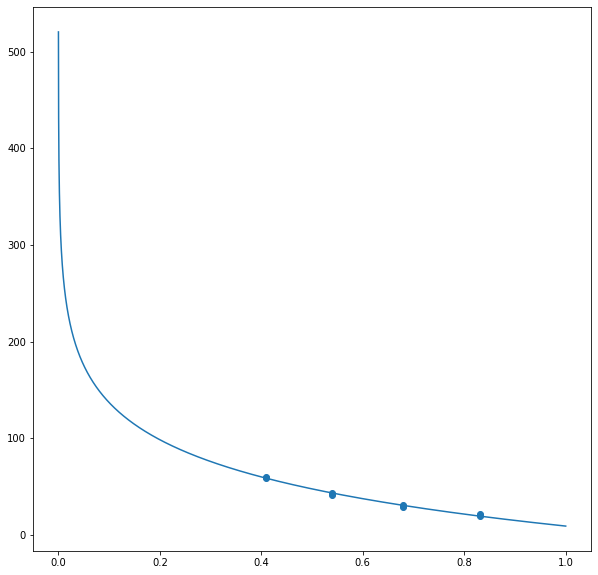

In [ ]:
#PLOT DA CURVA
xfit = np.arange(0,1,0.0001)
yfit = constantes[0][0] + constantes[0][1]*np.log(xfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(Dadosac,DadosRes)

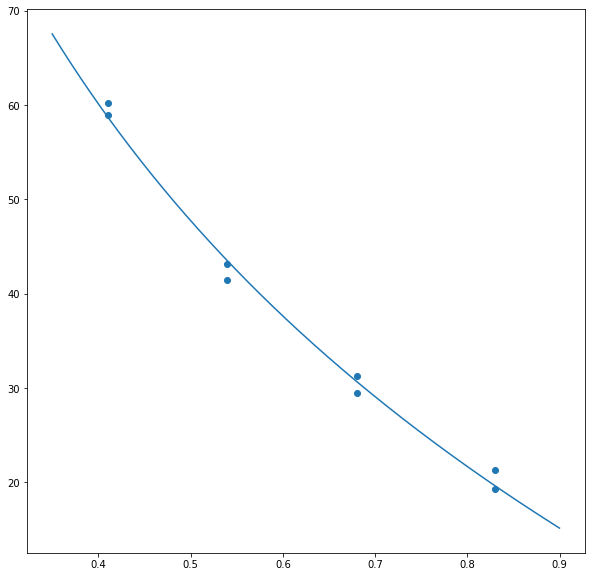

In [ ]:
#PLOT DA CURVA COM ZOOM
xzoomfit = np.arange(0.35,0.9,0.0002)
yzoomfit = constantes[0][0] + constantes[0][1]*np.log(xzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(Dadosac,DadosRes)

In [ ]:
#TESTE A/C FCM
Finalac = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        for idealac in range(0,10000):
            if(yfit[idealac]>=ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"]):
                print(i,j,yfit[idealac], idealac,ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])
                Finalac[i,j] = idealac/1000
            else:
                break

A saída de streaming foi truncada nas últimas 5000 linhas.
3 1 211.7969707768378 260 44.95
3 1 211.5839827094571 261 44.95
3 1 211.37180912998264 262 44.95
3 1 211.16044383276972 263 44.95
3 1 210.94988068282646 264 44.95
3 1 210.74011361474524 265 44.95
3 1 210.5311366316546 266 44.95
3 1 210.3229438041903 267 44.95
3 1 210.11552926948596 268 44.95
3 1 209.90888723018242 269 44.95
3 1 209.7030119534554 270 44.95
3 1 209.49789777006123 271 44.95
3 1 209.29353907340015 272 44.95
3 1 209.08993031859663 273 44.95
3 1 208.88706602159675 274 44.95
3 1 208.68494075828187 275 44.95
3 1 208.48354916359844 276 44.95
3 1 208.28288593070351 277 44.95
3 1 208.08294581012566 278 44.95
3 1 207.8837236089409 279 44.95
3 1 207.6852141899636 280 44.95
3 1 207.48741247095145 281 44.95
3 1 207.29031342382487 282 44.95
3 1 207.0939120739 283 44.95
3 1 206.89820349913532 284 44.95
3 1 206.70318282939164 285 44.95
3 1 206.5088452457047 286 44.95
3 1 206.31518597957094 287 44.95
3 1 206.12220031224518 288 44

In [ ]:
print("Teste a/c maximo : a/c para resistencia minima")
for i in range(0,4):
    for j in range(0,2):
        if(Finalac[i,j]/10<=(ClassesAgr[i]["a/c"][j])):
            print("Aprovado")
            print('Classe', i, j,'apovado', Finalac[i,j],(ClassesAgr[i]["a/c"][j]))
        else:
            print(Finalac[i,j],(ClassesAgr[i]["a/c"][j]), yfit[int(ClassesAgr[i]["a/c"][j]*10000)])
            Finalac[i,j] = ClassesAgr[i]["a/c"][j]*10

Teste a/c maximo : a/c para resistencia minima
7.492 0.65 32.95279707188987
6.855 0.6 37.46138247678244
6.855 0.6 37.46138247678244
6.273 0.55 42.36249384291817
6.273 0.55 42.36249384291817
5.74 0.5 47.731053929067485
5.253 0.45 53.665721770194054
5.253 0.45 53.665721770194054


[[6.5 6. ]
 [6.  5.5]
 [5.5 5. ]
 [4.5 4.5]]


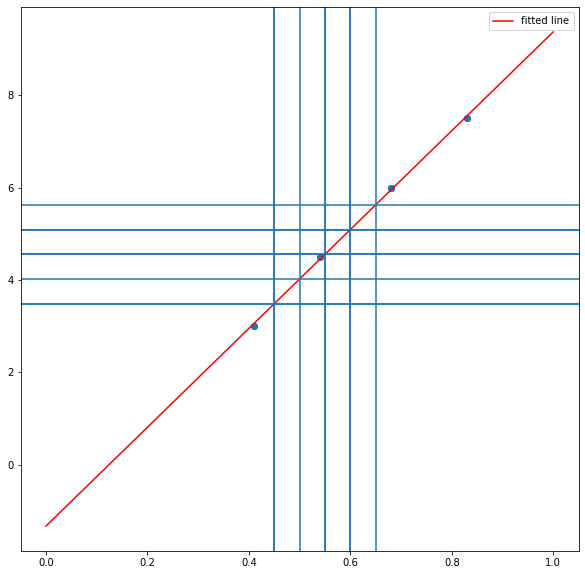

In [ ]:
print(Finalac)
import matplotlib.pyplot as plt
from scipy import stats
todosm = np.arange(0,10,0.0001)

plt.figure(figsize=(10,10))
res = stats.linregress(Dadosac, Dadosm)
x = np.arange(0,1,0.0001)
mac = res.intercept + res.slope*x
macfinal = np.zeros((4,2))
for i in range(0,4):
    for j in range(0,2):
        macfinal[i,j] = mac[int(1000*Finalac[i,j])]
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
for i in range(0,4):
    for j in range(0,2):
        txt = "i,j"
        plt.axvline(x = Finalac[i,j]/10)
        plt.axhline(y = mac[int(Finalac[i,j]*1000)])
plt.legend()
plt.scatter(Dadosac,Dadosm)
plt.show()

In [ ]:
macfinal

array([[5.62461774, 5.08944954],
       [5.08944954, 4.55428135],
       [4.55428135, 4.01911315],
       [3.48394495, 3.48394495]])

In [ ]:
Areia = np.zeros((4,2))
Pedra = np.zeros((4,2))
for i in range (0, 4):
  for j in range(0, 2):
    print(i,j)
    Areia[i,j] = float(DdosExtras["TeorArgS"])*(1+ macfinal[i,j])- 1
    Pedra[i,j] = macfinal[i,j] - Areia[i,j]

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


In [ ]:
print(Areia)
print(Pedra)

[[2.9014604  2.61148515]
 [2.61148515 2.3215099 ]
 [2.3215099  2.03153465]
 [1.74155941 1.74155941]]
[[3.19210396 2.95485149]
 [2.95485149 2.71759901]
 [2.71759901 2.48034653]
 [2.24309406 2.24309406]]


In [ ]:
print(constantes[0][0], constantes[0][1])

10.509310689334153 -51.00928059656361


In [ ]:
for i in range(0,4):
    for j in range(0,2):
        print(ClassesAgr[i]["Classe"][j] + 1.65  * DdosExtras["DP"])

24.95
29.95
29.95
34.95
34.95
39.95
44.95
44.95


In [ ]:
Areiateste = np.zeros(4)
Britateste = np.zeros(4)
m = [3, 4.5, 6, 7.5]
acteste = [0.41, 0.54, 0.68, 0.83] 
for i in range (0, 4):
    Areiateste[i] = float(DdosExtras["TeorArgS"])*(1 + m[i])- 1
    Britateste[i] = m[i] - Areiateste[i]
print(Areiateste, Britateste)

[1.2   2.025 2.85  3.675] [1.8   2.475 3.15  3.825]


In [ ]:
CC = np.zeros(4)
for i in range(0,4):
  CC[i] = 1000/((1/3.03)+(Areiateste[i]/2.63) + (Britateste[i]/2.95) + acteste[i])

In [ ]:
CC

array([553.56387607, 403.39203791, 316.30757181, 259.47192023])

In [ ]:
DadosCCfit = np.copy(CC)
constantes = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  m,  CC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


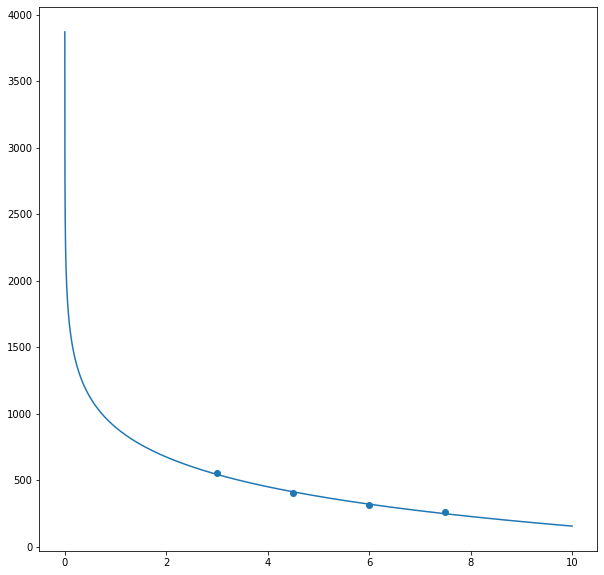

In [ ]:
xfit = np.arange(0,10,0.0001)
yfit = constantes[0][0] + constantes[0][1]*np.log(xfit)
plt.figure(figsize=(10,10))
plt.plot(xfit,yfit)
plt.scatter(m,CC)

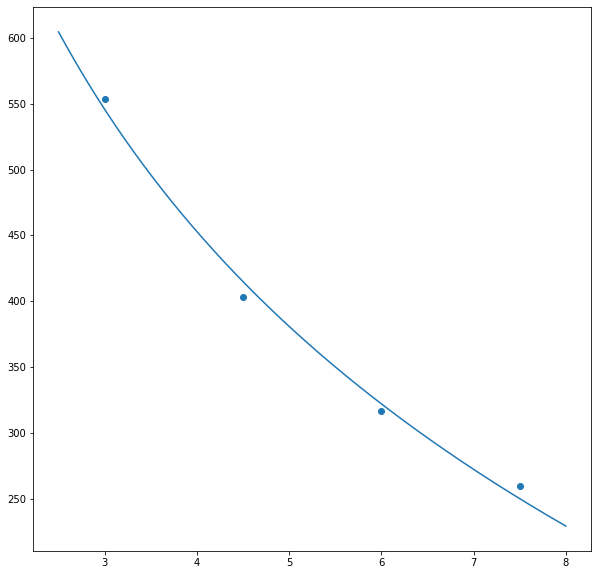

In [ ]:
xzoomfit = np.arange(2.5,8,0.0002)
yzoomfit = constantes[0][0] + constantes[0][1]*np.log(xzoomfit)
plt.figure(figsize=(10,10))
plt.plot(xzoomfit,yzoomfit)
plt.scatter(m,CC)

In [ ]:
constantes[0][0] + constantes[0][1]*np.log(3.48394495)

497.4864503877126

In [ ]:
ClasseI = {"a/c":[0.65, 0.6], "Classe":[20,25],"CC":260}
ClasseII = {"a/c":[0.6,0.55], "Classe":[25,30],"CC":280}
ClasseIII = {"a/c":[0.55,0.50], "Classe":[30,35],"CC":320}
ClasseIV = {"a/c":[0.45,0.45], "Classe":[40,40],"CC":360}

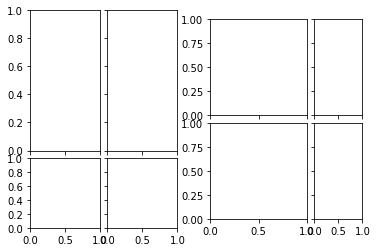

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure()

grid1 = ImageGrid(fig, 121, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [0, 1]:
    grid1[i].set_aspect(2)

grid2 = ImageGrid(fig, 122, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)
for i in [1, 3]:
    grid2[i].set_aspect(2)

plt.show()

In [ ]:
Dadosac

array([0.41, 0.41, 0.54, 0.54, 0.68, 0.68, 0.83, 0.83])

In [ ]:
DadosRes

array([60.2, 58.9, 43.2, 41.5, 29.5, 31.3, 19.3, 21.3])

In [ ]:
MediaRes = np.sum(DadosRes)

In [ ]:
Soma = 0
for i in range(0,8):
  Soma = Soma + (DadosRes[i] - (constantes[0][0] + constantes[0][1]*np.log(Dadosac[i])))**2
print(Soma)
soma1 = 0
for i in range(0,8):
  soma1 = Soma + (MediaRes/8 - DadosRes[i])**2
print('R2 = ', (soma1 - Soma)/soma1)

10.77418856189476
R2 =  0.9634397365831551
